In [39]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing import text,sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation,Embedding, Conv1D, GlobalMaxPooling1D, MaxPooling1D
from sklearn.model_selection import train_test_split
print(tf.__version__)

2.2.0


In [2]:
import matplotlib.pyplot as plt

In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.

In [3]:
train = pd.read_csv('train.csv')
train.sample(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
95584,ff9f2b117e68a1ea,"""\nAnd most mnemonic are not notable. Sorry to...",0,0,0,0,0,0
98665,0fd2c662a08d346b,The issue with the PowerPoint is two-fold: fir...,0,0,0,0,0,0
48450,8185f6e3ced4bf14,"Listen here fucker illythr, if I ever catch yo...",1,0,1,0,0,0
89398,ef25ac5bfc1ba2b4,"I never said Bush is a Dictator, but his actio...",0,0,0,0,0,0
81316,d97f79e966886a68,"January 2008 (UTC)\n Well, what about all o...",0,0,0,0,0,0


In [4]:
#check the number of examples under each label
#imbalanced labels
train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].sum(axis=0)

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

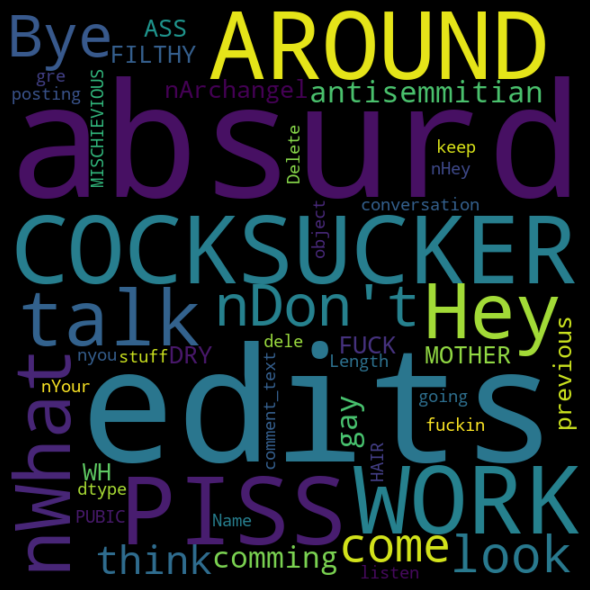

In [15]:
#visualize most common words from each label
from wordcloud import WordCloud, STOPWORDS

comments = train['comment_text'].loc[train['toxic']==1]

wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))

fig = plt.figure(
    figsize=(12,8),
    facecolor = 'k', 
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

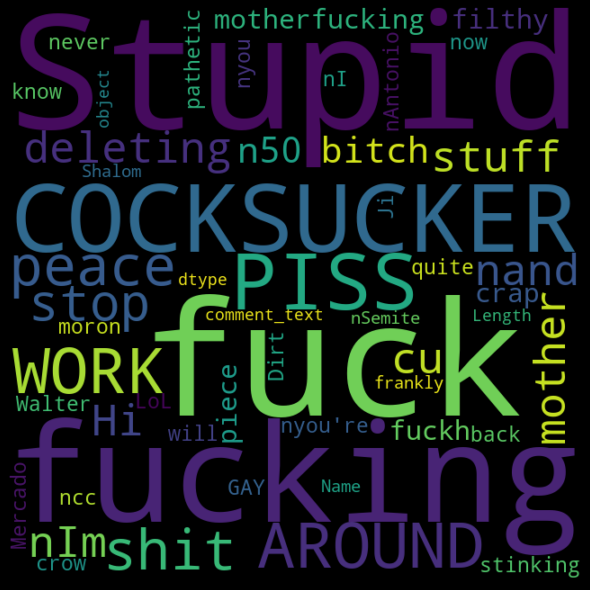

In [16]:
#visualize most common words from each label
from wordcloud import WordCloud, STOPWORDS

comments = train['comment_text'].loc[train['severe_toxic']==1]

wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))

fig = plt.figure(
    figsize=(12,8),
    facecolor = 'k', 
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

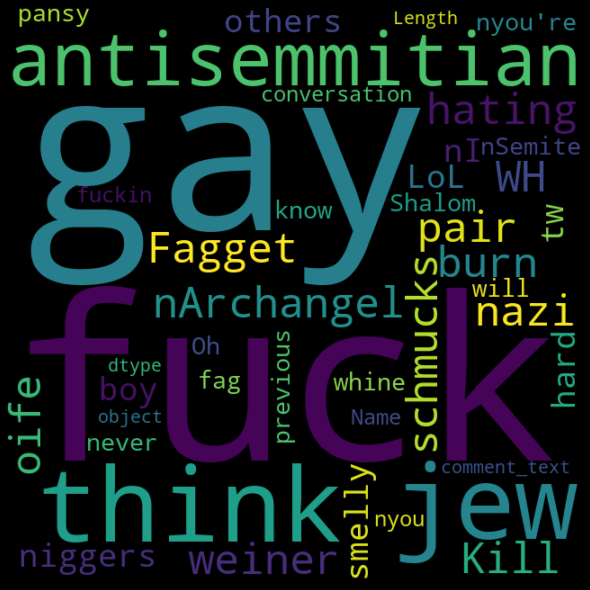

In [18]:
#visualize most common words from each label
from wordcloud import WordCloud, STOPWORDS

comments = train['comment_text'].loc[train['identity_hate']==1]

wordcloud = WordCloud(
    width = 640,
    height = 640,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(comments))

fig = plt.figure(
    figsize=(12,8),
    facecolor = 'k', 
    edgecolor = 'k')

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [5]:
test = pd.read_csv('test.csv')
test.sample(5)

,id,comment_text
125493,d1a2fb3e7ecf6c1e,"::::::::That's not just an opinion. On Schmo, ..."
7972,0d61750073a66926,==November 2004 Baghdad Ambush== \n Whats wron...
129037,d7b8701536b74c14,Please stop. If you continue to violate Wikipe...
106825,b2436bde48fd820d,""" \n :People get annoyed if other people refus..."
107289,b3040c0020fc878c,""" \n\n ==Legal Derivations== \n\n The man need..."


In [6]:
test_labels = pd.read_csv('test_labels.csv')
test_labels.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [7]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [8]:
x = train.comment_text.values

In [9]:
y = train[['toxic','severe_toxic','obscene','threat','insult','identity_hate']].values

In [10]:
train_n_test = pd.concat([train,test])
train_n_test.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0.0,0.0,0.0,0.0,0.0,0.0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0.0,0.0,0.0,0.0,0.0,0.0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0.0,0.0,0.0,0.0,0.0,0.0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0.0,0.0,0.0,0.0,0.0,0.0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
train_n_test['sent_len'] = train_n_test['comment_text'].apply(lambda x: len(x.strip(' ')))

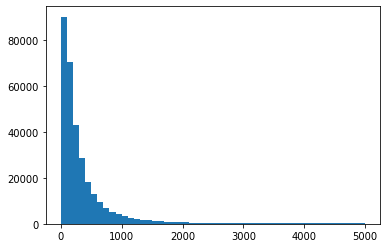

In [12]:
#visualize the overall len of sentences
plt.hist([l for l in train_n_test.sent_len],bins=50)
plt.show()

In [32]:
num_words = 20000
embed_dim = 100

In [13]:
#tokenize and pad text data
#x_tokenizer.word_index is a dict of this very corpus
x_tokenizer = text.Tokenizer(num_words=20000)
x_tokenizer.fit_on_texts(list(x))
x_tokenized = x_tokenizer.texts_to_sequences(x)
x_train_val = sequence.pad_sequences(x_tokenized,
                                    maxlen=400)

In [86]:
test_tokenized = x_tokenizer.texts_to_sequences(test.comment_text.values)
test_tokenized = sequence.pad_sequences(test_tokenized, maxlen=400)

In [14]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

In [30]:
%%time
#prepare embedding matrix with pretrained glove embeddings
#create a dictionary mapping words(strings) to their embedding vectors
#all i have to do is to look for indices of words in this very corpus, 
#and find the embedding vectors in the embedding dictionary for those word indices
embed_dict = dict()
f = open('glove.6B.100d.txt')
for line in f:
    embed = line.split()
    embed_dict[embed[0]] = np.asarray(embed[1:],dtype=np.float16)
f.close()
print(f'Found {len(embed_dict)} word embeddings.')

Found 400000 word embeddings.
CPU times: user 14 s, sys: 349 ms, total: 14.4 s
Wall time: 14.5 s


In [36]:
#create an embedding matrix that keras can use as an enbedding layer
#each entry of the embedding matrix represents a digit representation(index) for a word
embed_matrix = np.zeros((num_words, embed_dim))
for word, index in x_tokenizer.word_index.items():
    if index > num_words - 1:
        break
    else:
        vector = embed_dict.get(word)
        if vector is not None:
            embed_matrix[index] = vector

In [77]:
#create an embedding layer with the embedding matrix as embeddings_initializer
from tensorflow.keras.initializers import Constant 
from keras import backend as K
K.set_image_data_format('channels_first')

model = Sequential()
model.add(Embedding(num_words,
                   embed_dim,
                   embeddings_initializer = Constant(
                       embed_matrix),
                   trainable = False))
model.add(Dropout(0.2))

#add CNN as feature extraction before feeding it to a Dense or LSTM 
model.add(Conv1D(64, #number of filters, governing the output channels
                7, #kernel size
                padding = 'same'))  
model.add(MaxPooling1D(padding='same'))
model.add(Conv1D(64, #number of filters, governing the output channels
                7, #kernel size
                padding = 'same',
                activation = 'relu')) 
model.add(GlobalMaxPooling1D())
model.add(Dense(32, #hidden dimension of this dense layer
               activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(6,
               activation = 'sigmoid'))
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_11 (Embedding)     (None, None, 100)         2000000   
_________________________________________________________________
dropout_20 (Dropout)         (None, None, 100)         0         
_________________________________________________________________
conv1d_21 (Conv1D)           (None, None, 64)          44864     
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, None, 64)          0         
_________________________________________________________________
conv1d_22 (Conv1D)           (None, None, 64)          28736     
_________________________________________________________________
global_max_pooling1d_9 (Glob (None, 64)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 32)              

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [84]:
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y, test_size=0.15)

In [85]:
%%time
model.fit(x_train, y_train,
         batch_size = 32,
         epochs = 3,
         validation_data = (x_val, y_val))

Epoch 1/3
4239/4239 [==============================] - 348s 82ms/step - loss: 0.0778 - accuracy: 0.9102 - val_loss: 0.0580 - val_accuracy: 0.9937
Epoch 2/3
4239/4239 [==============================] - 365s 86ms/step - loss: 0.0636 - accuracy: 0.9902 - val_loss: 0.0550 - val_accuracy: 0.9934
Epoch 3/3
4239/4239 [==============================] - 377s 89ms/step - loss: 0.0602 - accuracy: 0.9876 - val_loss: 0.0547 - val_accuracy: 0.9939
CPU times: user 40min 45s, sys: 6min 21s, total: 47min 6s
Wall time: 18min 10s


In [87]:
y_test = model.predict(test_tokenized)

In [89]:
#create a submission
label_names = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']
submission_df = pd.DataFrame(columns=['id'] + label_names)
submission_df['id'] = test['id'].values 
submission_df[label_names] = y_test 
submission_df.to_csv("cnn_glove_submission.csv", index=False)